In [40]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns   #visualisation
%matplotlib inline     
sns.set(color_codes=True)


from random import randint
from scipy.stats import kurtosis, skew
import random

random.seed(111)
np.random.seed(111)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


### LOADING THE DATASET

In [41]:
df = pd.read_csv("mldata_0003149068.csv",delimiter=",",engine="python", index_col=0)
df_test = pd.read_csv("mldata_0003149068.TEST_FEATURES.csv", delimiter=",",engine="python",index_col=0)
df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,1,4.084397,2.014602,0.304810,0.245892,-1.632832,0.791329,1.123883,-3.369075,-3.390409,...,-1.707567,-2.884445,0.210622,-0.604440,0.614088,3.497162,-0.762986,3.754840,0.308745,-0.235451
1,0,-0.493184,-2.742297,0.597545,-0.086948,-3.021890,4.932074,0.670264,-4.469934,4.403349,...,0.440537,-0.837566,1.151839,0.369287,0.238134,0.715615,0.759864,-0.008118,-0.765407,0.360506
2,0,4.068311,-0.506531,-0.243120,-0.890832,-1.206677,-11.245426,0.362947,-2.638898,0.243398,...,-5.299464,-1.573668,1.893512,0.076125,0.484792,-0.936589,0.461590,-19.984552,-0.168352,-1.019378
3,0,-1.376127,-0.914673,-0.140154,0.292292,-0.001983,9.283914,-0.023916,0.966347,-4.624712,...,-2.770272,0.393384,1.007956,1.470841,0.191041,-1.511567,-2.307936,-8.186627,0.268968,0.860494
4,0,-6.066629,-2.451922,-0.208647,0.056012,2.655561,12.776713,-0.060518,-0.627694,-2.492449,...,1.711111,-1.639385,2.856401,0.936208,-0.913083,-0.658293,-1.064350,6.419730,-0.057863,1.005320


### EXPLORATORY DATA ANALYSIS 

In [42]:
df.shape

(1400, 36)

In [43]:
df.isnull().sum().sum()

0

In [44]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.492857,0.118544,-0.250854,0.014304,-0.099671,-0.512259,0.106398,0.052330,-0.386809,0.537492,...,-0.234480,-0.129842,0.415286,0.066755,0.113241,0.179443,0.175793,0.193118,-0.148534,0.099199
std,0.500128,4.216312,2.269687,0.374878,0.447274,2.078006,5.289512,0.757810,2.725965,3.275914,...,1.879126,2.214227,2.755264,0.769063,1.100687,2.392216,1.683129,5.394319,0.618586,0.788098
min,0.000000,-13.668314,-8.448968,-1.230268,-1.603926,-8.209830,-16.604382,-2.340333,-11.020683,-11.721879,...,-5.690106,-7.380195,-8.640928,-2.577171,-3.503285,-8.146465,-5.793159,-20.412707,-2.248110,-2.589179
25%,0.000000,-2.746249,-1.735476,-0.230634,-0.406730,-1.934409,-3.428594,-0.451653,-2.211082,-1.522900,...,-1.523798,-1.584368,-1.448087,-0.465628,-0.604844,-1.368444,-0.963089,-3.415255,-0.565486,-0.467170
50%,0.000000,0.208035,-0.245204,0.005704,-0.093652,-0.554360,0.155805,0.055587,-0.445672,0.549309,...,-0.270386,-0.127770,0.534923,0.018728,0.108937,0.221633,0.181447,0.298084,-0.138241,0.134826
75%,1.000000,2.903454,1.257961,0.265493,0.199605,0.878031,3.864108,0.577143,1.440497,2.688235,...,1.046740,1.298744,2.185995,0.587997,0.853433,1.807408,1.346724,3.782880,0.234796,0.652516
max,1.000000,15.084920,8.298467,1.199170,1.520150,6.795496,18.059623,2.267088,9.663618,10.006202,...,7.316391,7.422416,10.873458,2.587026,4.223020,7.741994,5.646399,17.541676,2.353597,3.091758


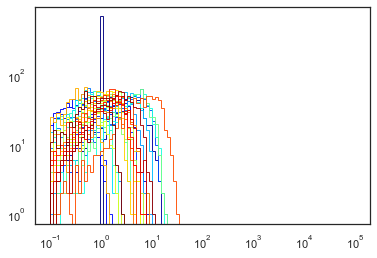

In [45]:
sns.set_style('white')
L=30
colors= dict(zip(np.arange(L),plt.cm.jet(np.linspace(0,1,L))))
for i,col in enumerate(df.columns[:L]):
    rand_column = df[[f'{col}']].values
    plt.hist(rand_column,bins = np.logspace(-1,5,100),color=colors[i],alpha=.9,histtype='step');
plt.yscale('log')
plt.xscale('log') #taking the log otherwhise the plot doesn't make much sense

(-200.0, 200.0)

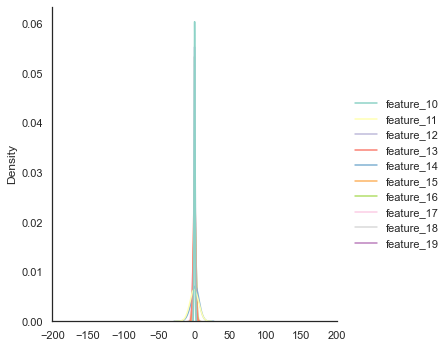

In [46]:
df_d = df.iloc[:, 10:20] 
sns.displot(data=df_d,palette="Set3",kind="kde", bw_adjust=2,)
plt.xlim((-200, 200))

(-200.0, 200.0)

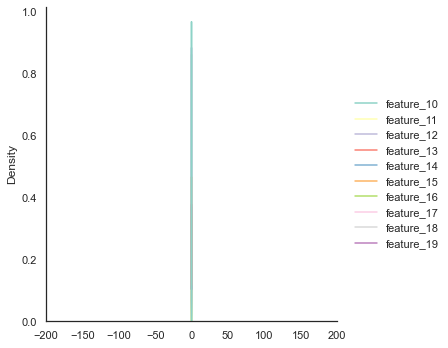

In [47]:
#STANDARDIZATION
standardizer = StandardScaler()
df_S = standardizer.fit_transform(df)
df_S = pd.DataFrame(df_S, columns=df.columns.tolist())

#NORMALIZATION
scaler = sklearn.preprocessing.Normalizer(norm = 'l2')
data = scaler.fit_transform(df)
df_N = pd.DataFrame(data, index=df.index, columns=df.columns)
df_N.describe()

df_aa = df_N.iloc[:, 10:20]
sns.displot(data=df_aa,palette="Set3",kind="kde", bw_adjust=2,)
plt.xlim((-200, 200))

The graph shows that the original data is very close to normalized version

[13, 20, 31]


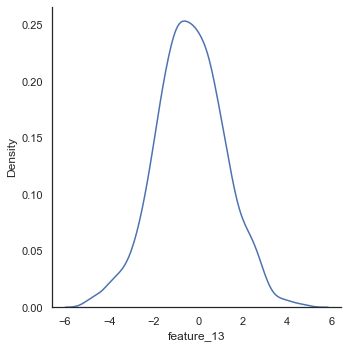

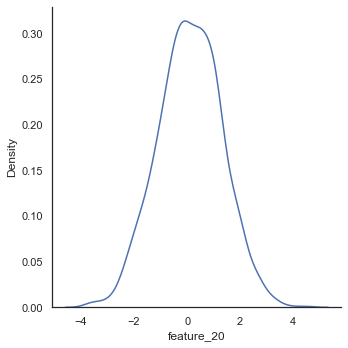

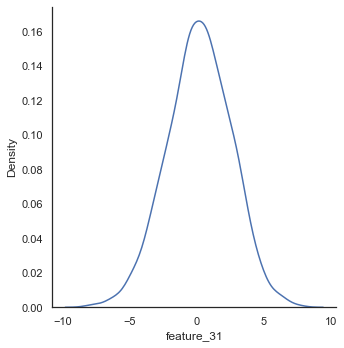

In [48]:
random_variable_indices = [randint(0,35) for i in range(0,3)]
print(random_variable_indices)

for i in random_variable_indices:
    sns.displot(
        df,
        x= df.columns.tolist()[i], 
        kind="kde"
    )


The plots confirm the data is almost identical to normal distribution and does not have skewness. 

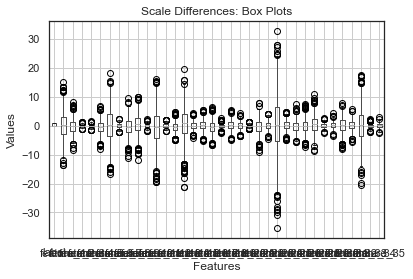

In [49]:
# Create box plots for each feature
df.boxplot()

# Set the title and labels
plt.title('Scale Differences: Box Plots')
plt.xlabel('Features')
plt.ylabel('Values')

# Display the plot
plt.show()

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label          1.000000
feature_1      5.649703
feature_2      2.993436
feature_3      0.496127
feature_4      0.606335
feature_5      2.812440
feature_6      7.292703
feature_7      1.028796
feature_8      3.651579
feature_9      4.211136
feature_10     0.816088
feature_11     7.593962
feature_12     0.871338
feature_13     2.019735
feature_14     6.764971
feature_15     1.633494
feature_16     2.317823
feature_17     2.734894
feature_18     0.894536
feature_19     2.134611
feature_20     1.608756
feature_21     0.515886
feature_22     3.073614
feature_23     1.833377
feature_24    11.887967
feature_25     2.001278
feature_26     2.570538
feature_27     2.883112
feature_28     3.634082
feature_29     1.053625
feature_30     1.458277
feature_31     3.175852
feature_32     2.309813
feature_33     7.198135
feature_34     0.800282
feature_35     1.119687
dtype: float64


In [51]:
df_noOut = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_noOut.shape)

(1071, 36)


We calculated the outliers, however, in our project outliers carry important information, thus, we do not delete them

In [52]:
def variable_sparsity(variable_series, threshold):
    if len(variable_series[variable_series == 0])/len(variable_series)>=threshold:
        return 1 # it is sparse
    else: 
        return 0 # it is not sparse

In [53]:
df_info_sparsity_th75 = (
    pd.DataFrame(df.apply(lambda x: variable_sparsity(x, 0.75), axis=0))
    .reset_index()
    .rename(columns={'index':'cell', 0:'flag_sparsity'})
)
df_info_sparsity_th75[df_info_sparsity_th75.flag_sparsity > 0]

,cell,flag_sparsity


We decide the threshold to %75 and we observe that none of the features are below that threshold so our features are quite expressive

In [54]:
df_Y = df.loc[:,"label"]
df_X = df.drop(columns="label")

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


Above, I created test sets only for my personal observations to see how will the algorithms work on some seperated set that is not used for the training.

In [56]:
scaler = sklearn.preprocessing.Normalizer(norm = 'l2')
data = scaler.fit_transform(X_train)
X_train_N = pd.DataFrame(data, index=X_train.index, columns=X_train.columns)
X_test_N = scaler.transform(X_test)
X_test_N = pd.DataFrame(X_test_N, columns=X_test.columns.tolist())

scaler = sklearn.preprocessing.Normalizer(norm = 'l2')
data_all = scaler.fit_transform(df_X)
df_X_N = pd.DataFrame(data_all, index=df_X.index, columns=df_X.columns)
df_test_N = scaler.transform(df_test)
df_test_N = pd.DataFrame(df_test_N, columns=df_test.columns.tolist())

In [57]:
standardizer = StandardScaler()
X_train_S = standardizer.fit_transform(X_train)
X_train_S = pd.DataFrame(X_train_S, columns=X_train.columns.tolist())
X_test_S = scaler.transform(X_test)
X_test_S = pd.DataFrame(X_test_S, columns=X_test.columns.tolist())

standardizer = StandardScaler()
df_X_S = standardizer.fit_transform(df_X)
df_X_S = pd.DataFrame(df_X_S, columns=df_X.columns.tolist())
df_test_S = scaler.transform(df_test)
df_test_S = pd.DataFrame(df_test_S, columns=df_test.columns.tolist())

In [58]:
df_all = [df_X,X_train,X_test,df_Y,y_train,y_test]
print("The lengh of {} dataset :{} train set:{}, test set:{}".format("df_X",len(df_all[0]),len(df_all[1]),len(df_all[2])))
print("The lengh of {} dataset :{} train set:{}, test set:{}".format("df_Y",len(df_all[3]),len(df_all[4]),len(df_all[5])))
X_train.head()

The lengh of df_X dataset :1400 train set:1120, test set:280
The lengh of df_Y dataset :1400 train set:1120, test set:280


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,-8.414586,0.508918,-0.561908,0.181189,0.031772,2.211277,-1.137080,-0.747177,-0.079279,0.165837,...,1.408158,1.666404,2.671319,-1.017088,-2.496106,-2.892421,-0.782641,3.191124,-0.045411,1.864978
1,4.809406,2.911094,-0.457796,-0.634912,-0.155284,-4.548287,-1.026168,-1.692230,1.665086,-0.970907,...,-0.695155,-3.580081,2.820019,-1.214164,0.055065,-1.623149,2.279991,-5.846058,0.042697,0.059852
2,-6.106021,2.794382,0.251881,1.520150,-8.209830,-14.903532,-0.480150,-5.374084,-2.976029,-1.626265,...,-2.591448,7.422416,-1.945519,-1.149005,0.460587,1.721503,1.815679,-3.545954,0.790778,0.141682
3,-0.892332,0.598211,-0.005785,0.307895,1.755788,-7.417351,0.850723,-0.493665,-4.074576,-0.603024,...,-3.935140,0.402469,-0.024985,1.025336,0.435351,2.794211,1.155444,-4.789858,-0.658444,0.075378
4,-1.422197,5.260689,-0.343816,-0.498149,0.282758,10.039551,0.326892,0.591266,1.776316,0.150641,...,0.601938,1.782052,1.040155,-0.085151,1.481333,2.396400,0.452483,4.471601,-0.326080,-0.148112


I seperated the dataset into train and test set, for the sake of my test set observations, while keeping the %80 of the data to be used for training. At the same time, I also normalized and standardized the features as, later on, we will compare the transformed datasets's performance within the algorithms.

### UNSUPERVISED

I know that our project does not require huge computational power but I will also be comparing the performance of dataset after dimensionality reduced in which at least %80 of the variance kept.

In [59]:
pca_df_train = PCA(random_state=101)
df_S_PCA_train = pca_df_train.fit_transform(df_X_S)
explained_variance_df_train = pca_df_train.explained_variance_ratio_
cumulative_sum_variance_train = np.cumsum(explained_variance_df_train)

pca_df_test = PCA(random_state=101)
df_S_PCA_test = pca_df_test.fit_transform(df_test_S)
explained_variance_df_test = pca_df_test.explained_variance_ratio_
cumulative_sum_variance_test = np.cumsum(explained_variance_df_test)


Text(0, 0.5, 'cumulative variance')

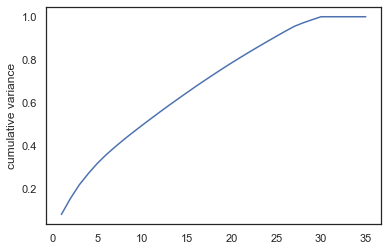

In [60]:
plt.plot(np.arange(1,36,1), cumulative_sum_variance_train[0:35])
plt.ylabel('cumulative variance')

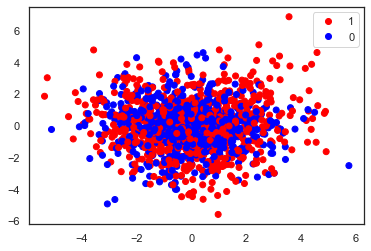

In [61]:
plt.figure()
plot = plt.scatter(df_S_PCA_train[:,0], df_S_PCA_train[:,1], c=df_Y, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["1","0"])
plt.show()

<Figure size 432x288 with 0 Axes>

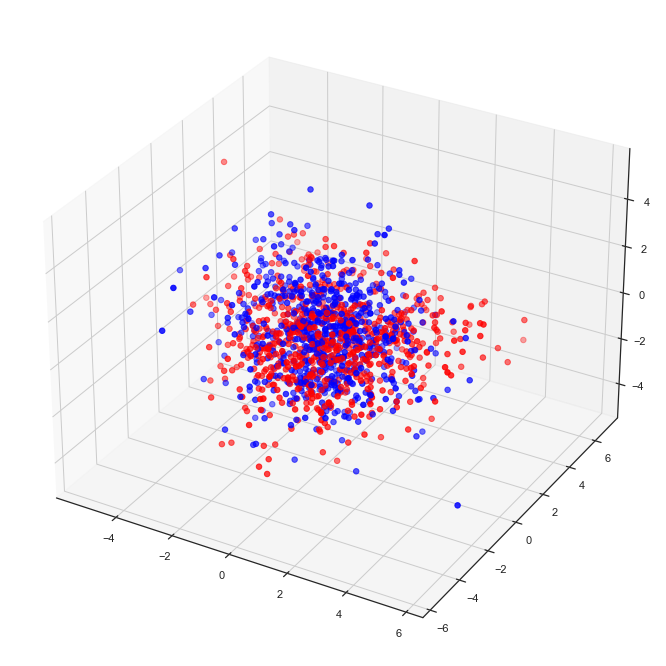

In [62]:
plt.figure()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_S_PCA_train[:,0],df_S_PCA_train[:,1], df_S_PCA_train[:,2], c =df_Y, cmap="bwr_r", s = 30)
plt.show()

In [63]:
tsne_df_train = TSNE(random_state=101)
X_train_S_tsne = tsne_df_train.fit_transform(df_X_S)

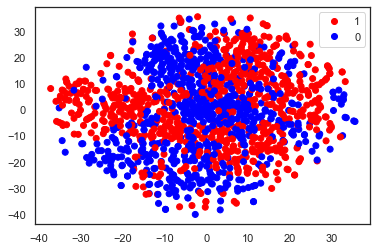

In [64]:
plt.figure()
plot = plt.scatter(X_train_S_tsne[:,0], X_train_S_tsne[:,1], c=df_Y, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["1","0"])
plt.show()

In [65]:
isomap = Isomap()
X_train_S_isomap = isomap.fit_transform(df_X_S)

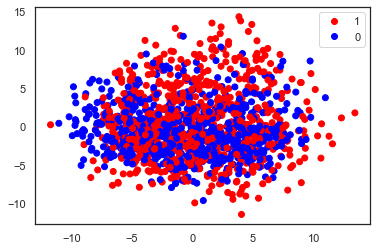

In [66]:
plt.figure()
plot = plt.scatter(X_train_S_isomap[:,0], X_train_S_isomap[:,1], c=df_Y, cmap="bwr_r")
plt.legend(handles=plot.legend_elements()[0], labels=["1","0"])
plt.show()

Even if I will compare the results of before and after pca performances, I can say that the performance after PCA will be worse as we could not catch any visible clusters or local relation after pca.

### SUPERVISED LEARNING RANDOM FOREST AND K-NEARESTNEIGHBORS ALGORITHMS

In this section, I will employ supervised algorithms onto original, standardized, normalized and PCA versions of the dataset. First, I will start with the whole dataset, of course, it will only give train set accuracy. In order to find optimal parameters, I set several parameter options for both RF and kNN algorithms. You can find them as dict_params. I decided predefined ranges for parameter scales as to prevent computational errors or overfitting. GridSearch will give the best combination of the parameters then I will calculate its accuracy by using cross validation with 10 folds. Below I will also make the graphs of every combination of parameters to see the accuracy differences of each of them.

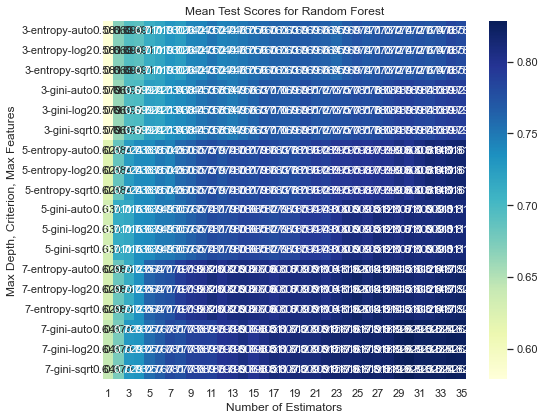

Results KNN Model
******************************
Accuracy:  0.825
F1-Score:  0.8247975503679299
Precision:  0.814753367410589
Recall:  0.8362318840579709
------------------------------
Best Parameters
******************************
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 30}
------------------------------


In [67]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier for the original data
model_RF_all = RandomForestClassifier(random_state=42, class_weight="balanced")

# Define the parameter grid for grid search
dict_params_RF_all = {
    "n_estimators": [i for i in range(1, 36)],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [5],
    "max_features": ["sqrt", "log2", "auto"]
}

# Perform grid search with RF
grid_RF_all = GridSearchCV(model_RF_all, dict_params_RF_all)
grid_RF_all.fit(df_X, df_Y)

# Extract the results from the grid search
df_results_all = pd.DataFrame(grid_RF_all.cv_results_)

# Select the columns of interest
df_filtered_all = df_results_all[['param_n_estimators', 'param_max_depth', 'param_criterion', 'param_max_features',
                          'mean_test_score']]

# Pivot the DataFrame to have parameter values as columns
df_pivot_all = df_filtered_all.pivot_table(index=['param_max_depth', 'param_criterion', 'param_max_features'],
                                   columns='param_n_estimators', values='mean_test_score')

# Create a heatmap plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_pivot_all, cmap='YlGnBu', annot=True, fmt='.3f', cbar=True)
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth, Criterion, Max Features')
ax.set_title('Mean Test Scores for Random Forest')
plt.tight_layout()
plt.show()

scoring_RF_all = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_RF_all = cross_validate(grid_RF_all, df_X, df_Y, cv=10, scoring=scoring_RF_all)

accuracy_scores_RF_all = cv_scores_RF_all['test_accuracy']
f1_scores_RF_all = cv_scores_RF_all['test_f1']
precision_scores_RF_all = cv_scores_RF_all['test_precision']
recall_scores_RF_all = cv_scores_RF_all['test_recall']

# Print the results
print('Results RF Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_RF_all.mean())
print('F1-Score: ', f1_scores_RF_all.mean())
print('Precision: ', precision_scores_RF_all.mean())
print('Recall: ', recall_scores_RF_all.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_RF_all.best_params_)
print('-'*30)



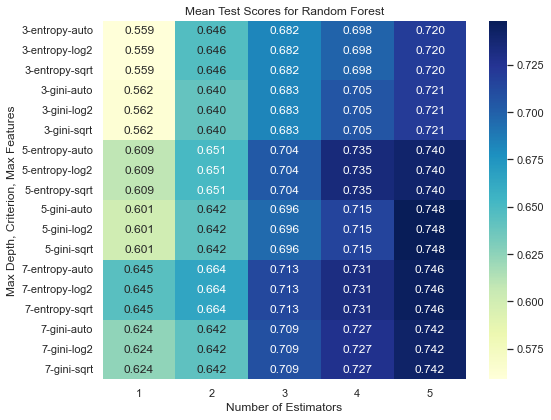

Results KNN Model
******************************
Accuracy:  0.7526785714285713
F1-Score:  0.7475719491665842
Precision:  0.746180441424275
Recall:  0.7525589225589225
------------------------------
Best Parameters
******************************
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 5}
------------------------------
Accuracy on the test set:  0.7607142857142857


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier for the original data
model_RF = RandomForestClassifier(random_state=42, class_weight="balanced")

# Define the parameter grid for grid search
dict_params_RF = {
    "n_estimators": [i for i in range(1, 36)],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [5],
    "max_features": ["sqrt", "log2", "auto"]
}

# Perform grid search with RF
grid_RF = GridSearchCV(model_RF, dict_params_RF)
grid_RF.fit(X_train, y_train)

# Extract the results from the grid search
df_results = pd.DataFrame(grid_RF.cv_results_)

# Select the columns of interest
df_filtered = df_results[['param_n_estimators', 'param_max_depth', 'param_criterion', 'param_max_features',
                          'mean_test_score']]

# Pivot the DataFrame to have parameter values as columns
df_pivot = df_filtered.pivot_table(index=['param_max_depth', 'param_criterion', 'param_max_features'],
                                   columns='param_n_estimators', values='mean_test_score')

# Create a heatmap plot
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.3f', cbar=True)
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth, Criterion, Max Features')
ax.set_title('Mean Test Scores for Random Forest')
plt.tight_layout()
plt.show()

scoring_RF = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_RF = cross_validate(grid_RF, X_train, y_train, cv=10, scoring=scoring_RF)

accuracy_scores_RF = cv_scores_RF['test_accuracy']
f1_scores_RF = cv_scores_RF['test_f1']
precision_scores_RF = cv_scores_RF['test_precision']
recall_scores_RF = cv_scores_RF['test_recall']

# Print the results
print('Results RF Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_RF.mean())
print('F1-Score: ', f1_scores_RF.mean())
print('Precision: ', precision_scores_RF.mean())
print('Recall: ', recall_scores_RF.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_RF.best_params_)
print('-'*30)

accuracy_test_RF = grid_RF.score(X_test, y_test)

print("Accuracy on the test set: ", accuracy_test_RF)


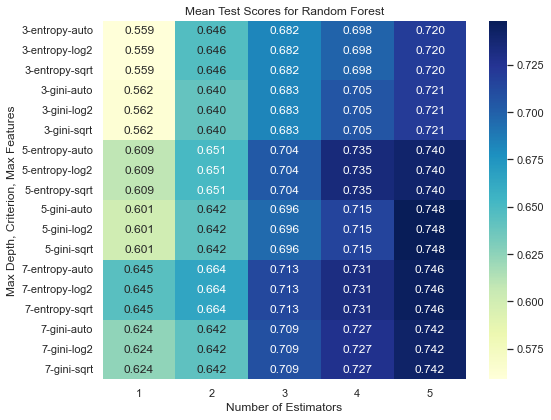

Results KNN Model
******************************
Accuracy:  0.825
F1-Score:  0.8247975503679299
Precision:  0.814753367410589
Recall:  0.8362318840579709
------------------------------
Best Parameters
******************************
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 30}
------------------------------


In [77]:
# Define the Random Forest classifier for the standardized data
model_RF_S = RandomForestClassifier(random_state=42, class_weight="balanced")

# Define the parameter grid for grid search
dict_params_RF_S = {
    "n_estimators": [i for i in range(1, 36)],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [5],
    "max_features": ["sqrt", "log2", "auto"]
}

# Perform grid search with RF
grid_RF_S = GridSearchCV(model_RF_S, dict_params_RF_S)
grid_RF_S.fit(df_X_S, df_Y)

# Extract the results from the grid search
df_results_S = pd.DataFrame(grid_RF_S.cv_results_)

# Select the columns of interest
df_filtered_S = df_results_S[['param_n_estimators', 'param_max_depth', 'param_criterion', 'param_max_features',
                          'mean_test_score']]

# Pivot the DataFrame to have parameter values as columns
df_pivot_S = df_filtered_S.pivot_table(index=['param_max_depth', 'param_criterion', 'param_max_features'],
                                   columns='param_n_estimators', values='mean_test_score')

# Create a heatmap plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.3f', cbar=True)
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth, Criterion, Max Features')
ax.set_title('Mean Test Scores for Random Forest')
plt.tight_layout()
plt.show()

scoring_RF_S = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_RF_S = cross_validate(grid_RF_S, df_X_S, df_Y, cv=10, scoring=scoring_RF_S)

accuracy_scores_RF_S = cv_scores_RF_S['test_accuracy']
f1_scores_RF_S = cv_scores_RF_S['test_f1']
precision_scores_RF_S = cv_scores_RF_S['test_precision']
recall_scores_RF_S = cv_scores_RF_S['test_recall']

# Print the results
print('Results RF Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_RF_S.mean())
print('F1-Score: ', f1_scores_RF_S.mean())
print('Precision: ', precision_scores_RF_S.mean())
print('Recall: ', recall_scores_RF_S.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_RF_S.best_params_)
print('-'*30)

# accuracy_test_RF_S = grid_RF_S.score(X_test_S, y_test)

# print("Accuracy on the test set: ", accuracy_test_RF_S)


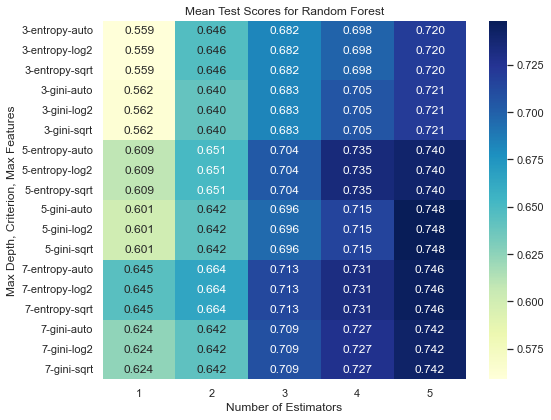

Results KNN Model
******************************
Accuracy:  0.6914285714285715
F1-Score:  0.692764426215232
Precision:  0.6791688006724657
Recall:  0.708695652173913
------------------------------
Best Parameters
******************************
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 5}
------------------------------


In [70]:
# Applying PCA to the train data with preserving over %80 of the information
pca_X_train = PCA(random_state=101, n_components=25)
X_train_S_PCA = pca_X_train.fit_transform(df_X_S)
# X_test_S_PCA =pca_X_train.transform(X_test_S)

# Define the Random Forest classifier for the data after PCA
model_RF_S_PCA = RandomForestClassifier(random_state=42, class_weight="balanced")

# Define the parameter grid for grid search
dict_params_RF_S_PCA = {
    "n_estimators": [i for i in range(1, 6)],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [5],
    "max_features": ["sqrt", "log2", "auto"]
}

# Perform grid search with RF
grid_RF_S_PCA = GridSearchCV(model_RF_S_PCA, dict_params_RF_S_PCA)
grid_RF_S_PCA.fit(X_train_S_PCA, df_Y)

# Extract the results from the grid search
df_results_S_PCA = pd.DataFrame(grid_RF_S_PCA.cv_results_)

# Select the columns of interest
df_filtered_S_PCA = df_results_S_PCA[['param_n_estimators', 'param_max_depth', 'param_criterion', 'param_max_features',
                          'mean_test_score']]

# Pivot the DataFrame to have parameter values as columns
df_pivot_S_PCA = df_filtered_S_PCA.pivot_table(index=['param_max_depth', 'param_criterion', 'param_max_features'],
                                   columns='param_n_estimators', values='mean_test_score')

# Create a heatmap plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.3f', cbar=True)
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth, Criterion, Max Features')
ax.set_title('Mean Test Scores for Random Forest')
plt.tight_layout()
plt.show()

scoring_RF_all = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_RF_S_PCA = cross_validate(grid_RF_S_PCA, X_train_S_PCA, df_Y, cv=10, scoring=scoring_RF_all)

accuracy_scores_RF_S_PCA = cv_scores_RF_S_PCA['test_accuracy']
f1_scores_RF_S_PCA = cv_scores_RF_S_PCA['test_f1']
precision_scores_RF_S_PCA = cv_scores_RF_S_PCA['test_precision']
recall_scores_RF_S_PCA = cv_scores_RF_S_PCA['test_recall']

# Print the results
print('Results KNN Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_RF_S_PCA.mean())
print('F1-Score: ', f1_scores_RF_S_PCA.mean())
print('Precision: ', precision_scores_RF_S_PCA.mean())
print('Recall: ', recall_scores_RF_S_PCA.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_RF_S_PCA.best_params_)
print('-'*30)

# accuracy_test_RF_S_PCA = grid_RF_S_PCA.score(X_test_S_PCA, y_test)

# print("Accuracy on the test set: ", accuracy_test_RF_S_PCA)


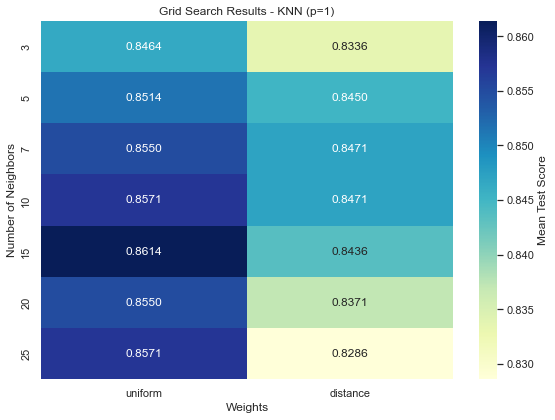

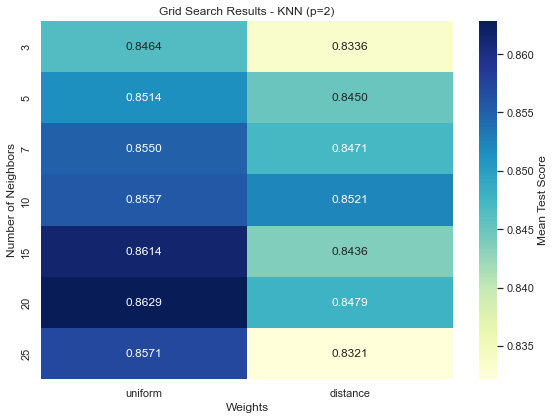

Results KNN Model
******************************
Accuracy:  0.8707142857142858
F1-Score:  0.8710047050274031
Precision:  0.8585531356837919
Recall:  0.8869565217391304
------------------------------
Best Parameters
******************************
{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
------------------------------


In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier for the original data
model_KNN_all = KNeighborsClassifier()

# Define the parameter grid for grid search
dict_params_KNN_all = {
    "n_neighbors": [3, 5, 7, 10, 15, 20, 25],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Perform grid search with KNN
grid_KNN_all = GridSearchCV(model_KNN_all, dict_params_KNN_all)
grid_KNN_all.fit(df_X,df_Y)

# Extract the results from the grid search
param_values_KNN_all = []
mean_test_scores_KNN_all = []

for params, mean_test_score in zip(grid_KNN_all.cv_results_['params'], grid_KNN_all.cv_results_['mean_test_score']):
    param_values_KNN_all.append(str(params))
    mean_test_scores_KNN_all.append(mean_test_score)

# Determine the number of unique values for each parameter
num_neighbors_KNN_all = len(dict_params_KNN_all['n_neighbors'])
num_weights_KNN_all = len(dict_params_KNN_all['weights'])
num_p_KNN_all = len(dict_params_KNN_all['p'])

# Reshape the mean test scores for plotting
mean_test_scores_KNN_all = np.array(mean_test_scores_KNN_all).reshape(num_neighbors_KNN_all, num_weights_KNN_all, num_p_KNN_all)

# Create a heatmap plot of the mean test scores
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN_all[:, :, 0], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN_all['weights'],
            yticklabels=dict_params_KNN_all['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=1)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN_all[:, :, 1], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN_all['weights'],
            yticklabels=dict_params_KNN_all['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=2)')
plt.tight_layout()
plt.show()

scoring_KNN_all = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_KNN_all = cross_validate(grid_KNN_all, df_X, df_Y, cv=10, scoring=scoring_KNN_all)

accuracy_scores_KNN_all = cv_scores_KNN_all['test_accuracy']
f1_scores_KNN_all = cv_scores_KNN_all['test_f1']
precision_scores_KNN_all = cv_scores_KNN_all['test_precision']
recall_scores_KNN_all = cv_scores_KNN_all['test_recall']

# Print the results
print('Results KNN Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_KNN_all.mean())
print('F1-Score: ', f1_scores_KNN_all.mean())
print('Precision: ', precision_scores_KNN_all.mean())
print('Recall: ', recall_scores_KNN_all.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_KNN_all.best_params_)
print('-'*30)


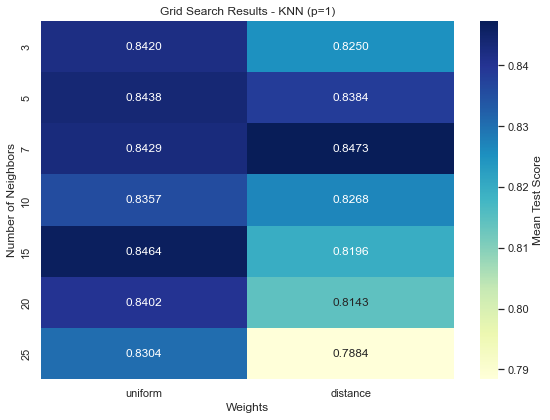

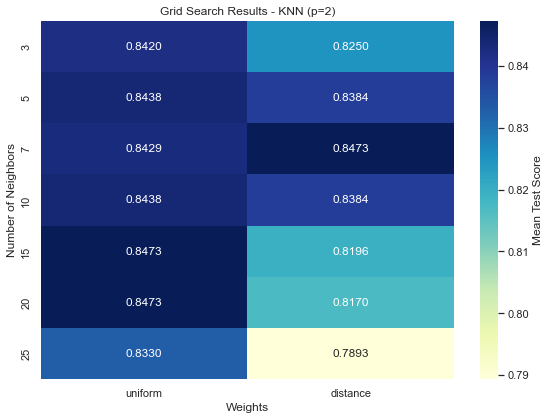

Results KNN Model
******************************
Accuracy:  0.8553571428571427
F1-Score:  0.8553472080915927
Precision:  0.8372120628379539
Recall:  0.8755218855218855
------------------------------
Best Parameters
******************************
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
------------------------------
Accuracy on the test set:  0.8428571428571429


In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier for the original data
model_KNN = KNeighborsClassifier()

# Define the parameter grid for grid search
dict_params_KNN = {
    "n_neighbors": [3, 5, 7, 10, 15, 20, 25],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Perform grid search with KNN
grid_KNN = GridSearchCV(model_KNN, dict_params_KNN)
grid_KNN.fit(X_train, y_train)

# Extract the results from the grid search
param_values_KNN = []
mean_test_scores_KNN = []

for params, mean_test_score in zip(grid_KNN.cv_results_['params'], grid_KNN.cv_results_['mean_test_score']):
    param_values_KNN.append(str(params))
    mean_test_scores_KNN.append(mean_test_score)

# Determine the number of unique values for each parameter
num_neighbors_KNN = len(dict_params_KNN['n_neighbors'])
num_weights_KNN = len(dict_params_KNN['weights'])
num_p_KNN = len(dict_params_KNN['p'])

# Reshape the mean test scores for plotting
mean_test_scores_KNN = np.array(mean_test_scores_KNN).reshape(num_neighbors_KNN, num_weights_KNN, num_p_KNN)

# Create a heatmap plot of the mean test scores
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN[:, :, 0], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN['weights'],
            yticklabels=dict_params_KNN['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=1)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN[:, :, 1], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN['weights'],
            yticklabels=dict_params_KNN['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=2)')
plt.tight_layout()
plt.show()

scoring_KNN = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_KNN = cross_validate(grid_KNN, X_train, y_train, cv=10, scoring=scoring_KNN)

accuracy_scores_KNN = cv_scores_KNN['test_accuracy']
f1_scores_KNN = cv_scores_KNN['test_f1']
precision_scores_KNN = cv_scores_KNN['test_precision']
recall_scores_KNN = cv_scores_KNN['test_recall']

# Print the results
print('Results KNN Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_KNN.mean())
print('F1-Score: ', f1_scores_KNN.mean())
print('Precision: ', precision_scores_KNN.mean())
print('Recall: ', recall_scores_KNN.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_KNN.best_params_)
print('-'*30)

accuracy_test_KNN = grid_KNN.score(X_test,y_test)
print("Accuracy on the test set: ", accuracy_test_KNN)


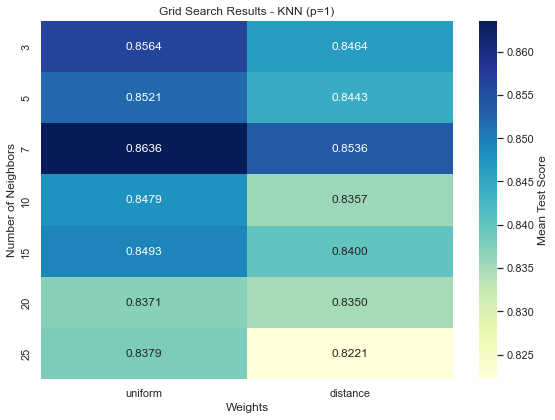

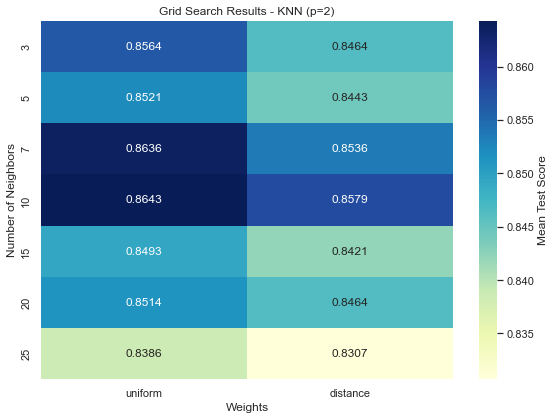

Results KNN Model
******************************
------------------------------
Accuracy:  0.8664285714285714
F1-Score:  0.8604679895440832
Precision:  0.8871183234961018
Recall:  0.8376811594202899
Best Parameters
******************************
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
------------------------------


In [73]:
# Define the KNN classifier for the normalized data
model_KNN_N = KNeighborsClassifier()

# Define the parameter grid for grid search
dict_params_KNN_N = {
    "n_neighbors": [3, 5, 7, 10, 15, 20, 25],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Perform grid search with KNN
grid_KNN_N = GridSearchCV(model_KNN_N, dict_params_KNN_N)
grid_KNN_N.fit(df_X_N, df_Y)

# Extract the results from the grid search
param_values_KNN_N = []
mean_test_scores_KNN_N = []

for params, mean_test_score in zip(grid_KNN_N.cv_results_['params'], grid_KNN_N.cv_results_['mean_test_score']):
    param_values_KNN_N.append(str(params))
    mean_test_scores_KNN_N.append(mean_test_score)

# Determine the number of unique values for each parameter
num_neighbors_KNN_N = len(dict_params_KNN_N['n_neighbors'])
num_weights_KNN_N = len(dict_params_KNN_N['weights'])
num_p_KNN_N = len(dict_params_KNN_N['p'])

# Reshape the mean test scores for plotting
mean_test_scores_KNN_N = np.array(mean_test_scores_KNN_N).reshape(num_neighbors_KNN_N, num_weights_KNN_N, num_p_KNN_N)

# Create a heatmap plot of the mean test scores
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN_N[:, :, 0], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN_N['weights'],
            yticklabels=dict_params_KNN_N['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=1)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN_N[:, :, 1], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN_N['weights'],
            yticklabels=dict_params_KNN_N['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=2)')
plt.tight_layout()
plt.show()

scoring_KNN_N = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_KNN_N = cross_validate(grid_KNN_N, df_X_N, df_Y, cv=10, scoring=scoring_KNN_N)

accuracy_scores_KNN_N = cv_scores_KNN_N['test_accuracy']
f1_scores_KNN_N = cv_scores_KNN_N['test_f1']
precision_scores_KNN_N = cv_scores_KNN_N['test_precision']
recall_scores_KNN_N = cv_scores_KNN_N['test_recall']

# Print the results
print('Results KNN Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('-' * 30)

print('Accuracy: ', accuracy_scores_KNN_N.mean())
print('F1-Score: ', f1_scores_KNN_N.mean())
print('Precision: ', precision_scores_KNN_N.mean())
print('Recall: ', recall_scores_KNN_N.mean())

print('Best Parameters')
print('*'*30)
print(grid_KNN_N.best_params_)
print('-'*30)

# accuracy_test_KNN_N = grid_KNN_N.score(X_test_N,y_test)
# print("Accuracy on the test set: ", accuracy_test_KNN_N)


In [81]:
# Define the KNN classifier for the normalized data
model_KNN_N2 = KNeighborsClassifier()

# Define the parameter grid for grid search
dict_params_KNN_N2 = {
    "n_neighbors": [3, 5, 7, 10, 15, 20, 25],
    "weights": ["uniform", "distance"],
    "algorithm":("auto","ball_tree","kd_tree","brute"),
    "p": [1, 2,3,4]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Perform grid search with KNN
grid_KNN_N2 = GridSearchCV(model_KNN_N2, dict_params_KNN_N2)
grid_KNN_N2.fit(X_train_N, y_train)

scoring_KNN_N2 = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_KNN_N2 = cross_validate(grid_KNN_N2, X_train_N, y_train, cv=10, scoring=scoring_KNN_N2)

accuracy_scores_KNN_N2 = cv_scores_KNN_N2['test_accuracy']
f1_scores_KNN_N2 = cv_scores_KNN_N2['test_f1']
precision_scores_KNN_N2 = cv_scores_KNN_N2['test_precision']
recall_scores_KNN_N2 = cv_scores_KNN_N2['test_recall']

# Print the results
print('Results KNN Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('-' * 30)

print('Accuracy: ', accuracy_scores_KNN_N2.mean())
print('F1-Score: ', f1_scores_KNN_N2.mean())
print('Precision: ', precision_scores_KNN_N2.mean())
print('Recall: ', recall_scores_KNN_N2.mean())

print('Best Parameters')
print('*'*30)
print(grid_KNN_N2.best_params_)
print('-'*30)

accuracy_test_KNN_N2 = grid_KNN_N2.score(X_test_N,y_test)
print("Accuracy on the test set: ", accuracy_test_KNN_N2)


Results KNN Model
******************************
------------------------------
Accuracy:  0.8616071428571429
F1-Score:  0.8516119848835307
Precision:  0.8906210649355517
Recall:  0.8169023569023569
Best Parameters
******************************
{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
------------------------------
Accuracy on the test set:  0.875


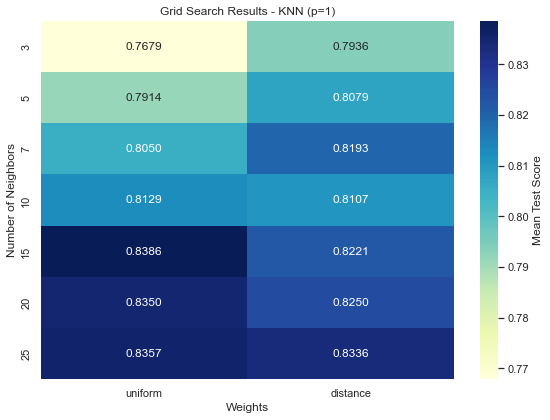

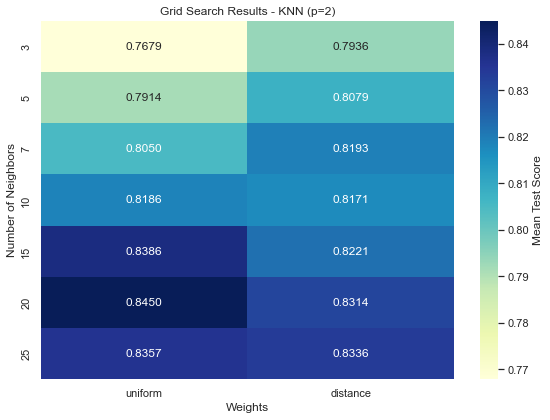

Results KNN Model
******************************
Accuracy:  0.8235714285714286
F1-Score:  0.8234351278376566
Precision:  0.8147182200877852
Recall:  0.8333333333333334
------------------------------
Best Parameters
******************************
{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
------------------------------


In [74]:
# Define the KNN classifier for the data after PCA
model_KNN_S_PCA = KNeighborsClassifier()

# Define the parameter grid for grid search
dict_params_KNN_S_PCA = {
    "n_neighbors": [3, 5, 7, 10, 15, 20, 25],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Perform grid search with KNN
grid_KNN_S_PCA = GridSearchCV(model_KNN_S_PCA, dict_params_KNN_S_PCA)
grid_KNN_S_PCA.fit(X_train_S_PCA, df_Y)

# Extract the results from the grid search
param_values_KNN_S_PCA = []
mean_test_scores_KNN_S_PCA = []

for params, mean_test_score in zip(grid_KNN_S_PCA.cv_results_['params'], grid_KNN_S_PCA.cv_results_['mean_test_score']):
    param_values_KNN_S_PCA.append(str(params))
    mean_test_scores_KNN_S_PCA.append(mean_test_score)

# Determine the number of unique values for each parameter
num_neighbors_KNN_S_PCA = len(dict_params_KNN_S_PCA['n_neighbors'])
num_weights_KNN_S_PCA = len(dict_params_KNN_S_PCA['weights'])
num_p_KNN_S_PCA = len(dict_params_KNN_S_PCA['p'])

# Reshape the mean test scores for plotting
mean_test_scores_KNN_S_PCA = np.array(mean_test_scores_KNN_S_PCA).reshape(num_neighbors_KNN_S_PCA, num_weights_KNN_S_PCA, num_p_KNN_S_PCA)

# Create a heatmap plot of the mean test scores
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN_S_PCA[:, :, 0], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN_S_PCA['weights'],
            yticklabels=dict_params_KNN_S_PCA['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=1)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mean_test_scores_KNN_S_PCA[:, :, 1], annot=True, cmap='YlGnBu', xticklabels=dict_params_KNN_S_PCA['weights'],
            yticklabels=dict_params_KNN_S_PCA['n_neighbors'], fmt='.4f', cbar_kws={'label': 'Mean Test Score'})
ax.set_xlabel('Weights')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Grid Search Results - KNN (p=2)')
plt.tight_layout()
plt.show()

scoring_KNN_S_PCA = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Compute cross-validation scores
cv_scores_KNN_S_PCA = cross_validate(grid_KNN_S_PCA, X_train_S_PCA, df_Y, cv=10, scoring=scoring_KNN_S_PCA)

accuracy_scores_KNN_S_PCA = cv_scores_KNN_S_PCA['test_accuracy']
f1_scores_KNN_S_PCA = cv_scores_KNN_S_PCA['test_f1']
precision_scores_KNN_S_PCA = cv_scores_KNN_S_PCA['test_precision']
recall_scores_KNN_S_PCA = cv_scores_KNN_S_PCA['test_recall']

# Print the results
print('Results KNN Model')
print('*' * 30)
#print('Average Performance after cross-validation: ', cv_scores_KNN_all.mean())
#print("With standart deviation: ",cv_scores_KNN_all.std())
print('Accuracy: ', accuracy_scores_KNN_S_PCA.mean())
print('F1-Score: ', f1_scores_KNN_S_PCA.mean())
print('Precision: ', precision_scores_KNN_S_PCA.mean())
print('Recall: ', recall_scores_KNN_S_PCA.mean())
print('-' * 30)
print('Best Parameters')
print('*'*30)
print(grid_KNN_S_PCA.best_params_)
print('-'*30)

# accuracy_test_KNN_S_PCA = grid_KNN_S_PCA.score(X_test_S_PCA,y_test)
# print("Accuracy on the test set: ", accuracy_test_KNN_S_PCA)


### EVALUATION

In [78]:
perf_cv_summary =[{
    'SL Algorithm': 'Random Forest',
    'Accuracy':accuracy_scores_RF_all.mean(),
    'F1 Score':f1_scores_RF_all.mean(),
    'Precision':precision_scores_RF_all.mean(),
    'Recall':recall_scores_RF_all.mean(),
},{
    'SL Algorithm': 'Random Forest Train/Test Splitted',
    'Accuracy':accuracy_scores_RF.mean(),
    'F1 Score':f1_scores_RF.mean(),
    'Precision':precision_scores_RF.mean(),
    'Recall':recall_scores_RF.mean(),
},{
    'SL Algorithm': 'Random Forest Standardized',
    'Accuracy':accuracy_scores_RF_S.mean(),
    'F1 Score':f1_scores_RF_S.mean(),
    'Precision':precision_scores_RF_S.mean(),
    'Recall':recall_scores_RF_S.mean(),
},{
    'SL Algorithm': 'Random Forest with PCA',
    'Accuracy':accuracy_scores_RF_S_PCA.mean(),
    'F1 Score':f1_scores_RF_S_PCA.mean(),
    'Precision':precision_scores_RF_S_PCA.mean(),
    'Recall':recall_scores_RF_S_PCA.mean(),
},{
    'SL Algorithm': 'k-NearestNeighbors',
    'Accuracy':accuracy_scores_KNN_all.mean(),
    'F1 Score':f1_scores_KNN_all.mean(),
    'Precision':precision_scores_KNN_all.mean(),
    'Recall':recall_scores_KNN_all.mean(),
},{
    'SL Algorithm': 'k-NearestNeighbors Train/Test Splitted',
    'Accuracy':accuracy_scores_KNN.mean(),
    'F1 Score':f1_scores_KNN.mean(),
    'Precision':precision_scores_KNN.mean(),
    'Recall':recall_scores_KNN.mean(),
},{
    'SL Algorithm': 'k-NearestNeighbors Normalized',
    'Accuracy':accuracy_scores_KNN_N.mean(),
    'F1 Score':f1_scores_KNN_N.mean(),
    'Precision':precision_scores_KNN_N.mean(),
    'Recall':recall_scores_KNN_N.mean(),
},{
    'SL Algorithm': 'k-NearestNeighbors with PCA',
    'Accuracy':accuracy_scores_KNN_S_PCA.mean(),
    'F1 Score':f1_scores_KNN_S_PCA.mean(),
    'Precision':precision_scores_KNN_S_PCA.mean(),
    'Recall':recall_scores_KNN_S_PCA.mean(),
}
]
pd.DataFrame.from_dict(perf_cv_summary)

,SL Algorithm,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.825000,0.824798,0.814753,0.836232
1,Random Forest Train/Test Splitted,0.752679,0.747572,0.746180,0.752559
2,Random Forest Standardized,0.825000,0.824798,0.814753,0.836232
3,Random Forest with PCA,0.691429,0.692764,0.679169,0.708696
4,k-NearestNeighbors,0.870714,0.871005,0.858553,0.886957
5,k-NearestNeighbors Train/Test Splitted,0.855357,0.855347,0.837212,0.875522
6,k-NearestNeighbors Normalized,0.866429,0.860468,0.887118,0.837681
7,k-NearestNeighbors with PCA,0.823571,0.823435,0.814718,0.833333


In [76]:
best_model_KNN = KNeighborsClassifier(n_neighbors = grid_KNN_N.best_params_['n_neighbors'], 
                                      p = grid_KNN_N.best_params_['p'],
                                      weights = grid_KNN_N.best_params_['weights'],
                                    )


#RESULTS OF BEST MODEL

# Train the model
best_model_KNN.fit(df_X_N, df_Y)

# Make predictions on test data
y_preds = best_model_KNN.predict(df_test_N)

# Create a DataFrame with the predictions
predictions_df_all = pd.DataFrame({'Predicted label': y_preds})

# Save the predictions to a text file
predictions_df_all.to_csv('test_predictions.txt', header=False, index=False)

### CONCLUSION

After evaluated both kNN and RF algorithms with several approaches, I observed that Random forest takes a lots of time, exponential run time, when I set the number of estimators more than 15. Even though we see that Random forest gives slight better result with 30 estimators than 5, it is still far worse than kNN, not to mention to get %87 accuracy from kNN took 25 seconds whilst to get %82 accuracy from RF took 32 minutes. So we see that kNN with original data has shown better accuracy among all, giving slight better results than normalized one, given the original dataset was very close to normal distribution. However, the normalized version consistently outperforms the original dataset in terms of F1-score, precision, and recall. On the other hand, the version with PCA has lower performance compared to both the original and normalized versions. Considering these results, I chose the kNN algorithm with normalized features as the best one. This version consistently performs well across multiple evaluation metrics, indicating that it is likely to generalize better and avoid overfitting compared to the original dataset. The reason why normalization of the features is essential in kNN is because kNN measures the distance between points and the different scales for each feature might affect the contribution for each feature that cause some features to dominate the algorithm.